In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

(-0.1, 0.1)

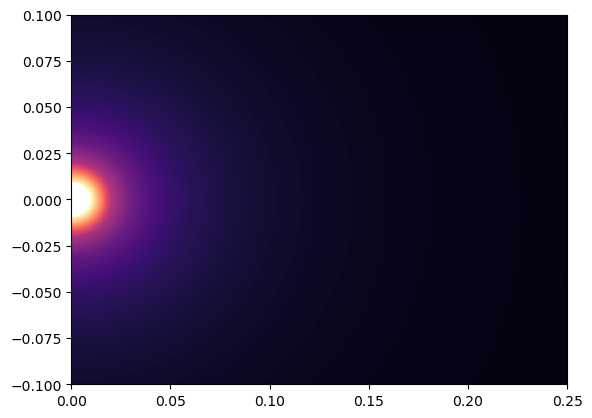

In [13]:
def e_field(r, theta, phi):
    k = 1 / 4*np.pi*constants.epsilon_0
    const = k / r

    Er = const*3
    Etheta = const*2*np.sin(theta)*np.cos(theta)*np.sin(phi)
    Ephi = const*np.sin(theta)*np.cos(phi)
    
    E_mag = np.sqrt(Er**2 + Etheta**2 + Ephi**2)

    return E_mag

r = np.linspace(0.01, 1, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

R, Theta, Phi = np.meshgrid(r, theta, phi)

E_field = e_field(R, Theta, Phi)
E_field = E_field[:, :, 0]

X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

lim = 0.1
plt.contourf(X[:, :, 0], Z[:, :, 0], E_field, levels = 1000, cmap = 'magma')
plt.xlim(0, 2.5*lim)
plt.ylim(-lim,lim)

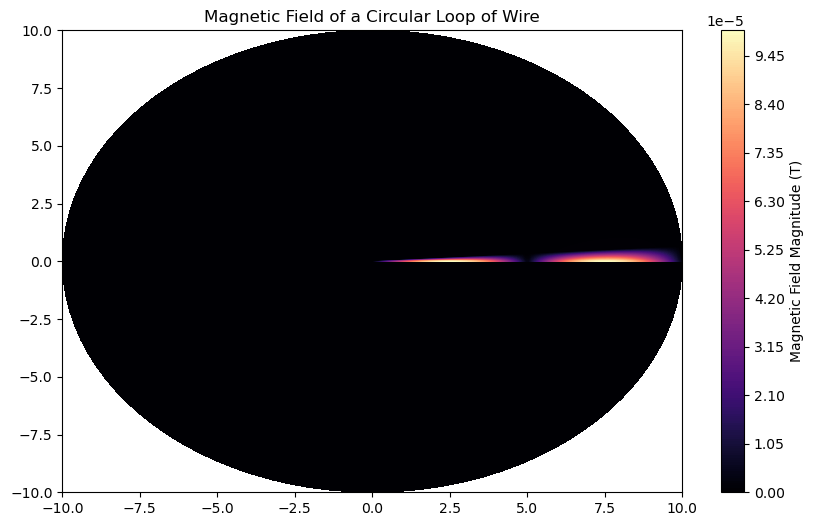

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu_0 = 4*np.pi*1e-7  # Permeability of free space

# Define the loop of wire
b = 3  # Radius of the loop

# Define the observation grid
r = np.linspace(0.001, 10, 100)  # r from slightly above 0 to 3 times the loop radius
theta = np.linspace(0, 2*np.pi, 100)  # theta from 0 to 2*pi
z = np.linspace(0, 10, 100)
R, Theta = np.meshgrid(r, theta)

# Calculate the magnetic field components
B_r = np.zeros_like(R)
B_theta = np.zeros_like(Theta)

for i in range(len(R)):
    for j in range(len(Theta)):
        r_value = r[i]
        theta_value = theta[j]

        B_r[i, j] = 0  # No radial component since we're considering a circular loop
        B_theta[i, j] = (mu_0 / (4*np.pi)) * (1 / r_value) * b**2 * np.sin(theta_value) / (r_value**2 + b**2 - 2*r_value*b*np.cos(theta_value))

# Calculate the total magnetic field magnitude
B_mag = np.sqrt(B_r**2 + B_theta**2)

X = R*np.cos(Theta)
Y = R*np.sin(Theta)

# Plot
lim = 10
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, B_mag, levels=200, cmap='magma')
plt.colorbar(contour, label='Magnetic Field Magnitude (T)')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title('Magnetic Field of a Circular Loop of Wire')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def magnetic_field(r, theta, R, I):
    # Calculate the magnetic field components in polar coordinates
    mu_0 = 4 * np.pi * 10**-7
    B_r = 0
    #B_r = (mu_0 * I * b**2) / (2 * np.pi * (r**2 + b**2 - 2 * r * b * np.cos(theta))**(3/2))
    B_theta = (mu_0*I*b**2*np.sin(theta)) / (2 * np.pi * (r**2 + b**2)**(3/2))
    #B_theta = (mu_0*I*b**2) / (2*(r**2 + b**2)**(3/2))

    return B_r, B_theta

# Circular loop parameters
b = 0.5  # Radius of the loop
I = 1  # Current through the loop

r = np.linspace(0.001, 1, 100)
theta = np.linspace(0, 2*np.pi, 100)
R, Theta = np.meshgrid(r, theta)

# Calculate the magnetic field components
B_r, B_theta = magnetic_field(R, Theta, b, I)
B_mag = np.sqrt(B_r**2 + B_theta**2)

X = R*np.cos(Theta)
Z = R*np.sin(Theta)

# Create a contour plot
lim = 5
plt.figure(figsize=(8, 6))
plt.contourf(X, Z, B_mag, cmap='magma', levels=200)
plt.colorbar(label='|B| (T)')
plt.title('Magnetic Field of Circular Loop')
plt.show()


C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\1728674937.py:68: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop1.norm, cmap=loop1.cmap))


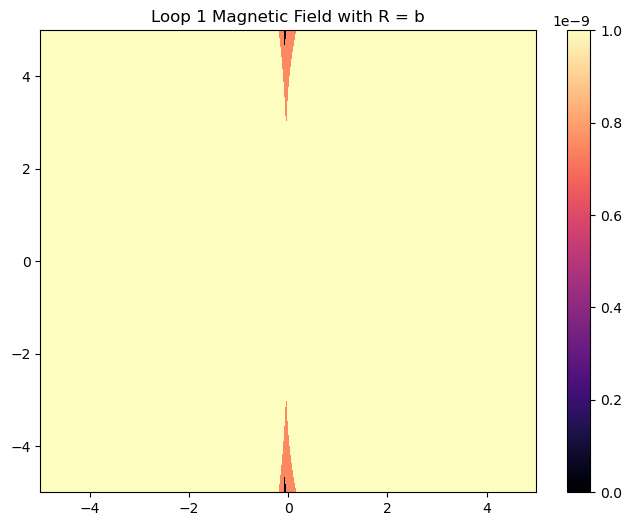

C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\1728674937.py:76: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop2.norm, cmap=loop2.cmap))


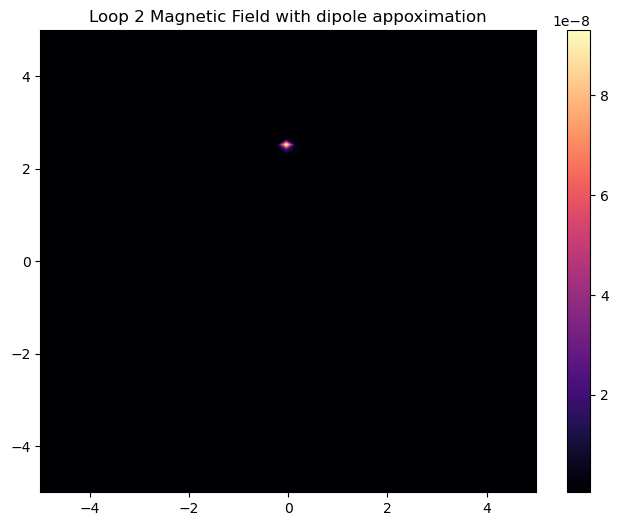

C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\1728674937.py:84: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))


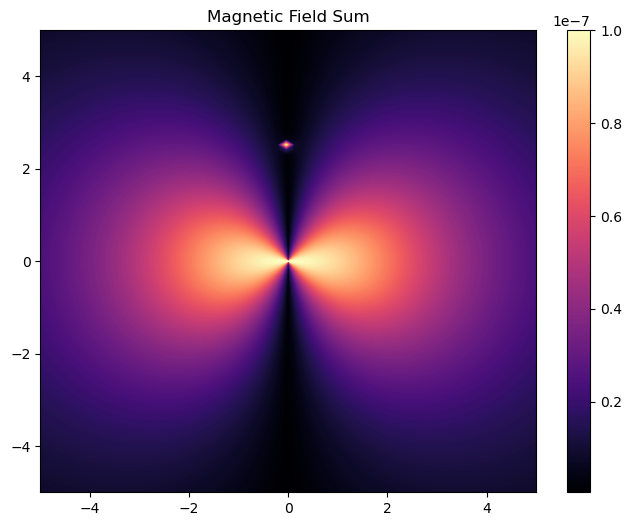

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants

def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

def dipole_magnetic_field(r, theta, R, I):
    # Have to add the calculation of the magnetic field due to an induced emf. To calculate emf we can use (emf = -M*dI_1/dt) and give the loops some internal resistance in order to calculate
    # emf = I_2R_2. Solving this for I_2 we get the induced current due to the change in current of the other loop. Now that we have this current we can add it to the internal current that it may have
    # in order to get the total current flowing through the loop. We use this current then to find the magnetic field. 
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - 2.5)**2))**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)
    
    return Br, Btheta

# Initializing values
lim = 5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, 2*np.pi, 100)  # Polar angle
ts = np.linspace(0,10,3) # Time array
ms = [] # Magnetic moment list for dipole
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 50 # Frequency of current
omega = 2*constants.pi*f # Angular frequency of current
I0 = 2 # Peak current
Is = [] # Empty current list for plotting
j = 0 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 0.4e-2 # Radius of little loop of wire
z = (1/2)*lim # Separation between loops
res = 1
'''
M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2))
emf = -M*(I/ts)
I_induced = emf / res
I_total = I0 + I_induced
'''

Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, R=b, I=I0)
B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

Br_loop2, Btheta_loop2 = dipole_magnetic_field(R, Theta, R=a, I=I0)
B_mag_loop2 = np.sqrt(Br_loop2**2 + Btheta_loop2**2)

# Convert polar coordinates to Cartesian coordinates
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

vmin = 0
vmax = 1e-9

# Plot magnetic field using contour plot
plt.figure(figsize=(8, 6))
loop1 = plt.contourf(X, Y, B_mag_loop, levels=200, cmap='magma', extend='both', vmax=vmax, vmin=vmin)
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Loop 1 Magnetic Field with R = b')
plt.colorbar(ScalarMappable(norm=loop1.norm, cmap=loop1.cmap))
plt.show()

plt.figure(figsize=(8, 6))
loop2 = plt.contourf(X, Y, B_mag_loop2, levels=200, cmap='magma', extend='both')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Loop 2 Magnetic Field with dipole appoximation')
plt.colorbar(ScalarMappable(norm=loop2.norm, cmap=loop2.cmap))
plt.show()

plt.figure(figsize=(8, 6))
loop3 = plt.contourf(X, Y, B_mag_loop2 + B_mag_loop, levels=200, cmap='magma', extend='both')
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.title(f'Magnetic Field Sum')
plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))
plt.show()

Dipole moment: 4.814760441028187e-12
Flowing current in B: 0.0
EMF in A: 3.2098402940187915e-13
Induced current in A: 3.2098402940187915e-13
EMF in B: -3.434358237702214e-26
Induced current in B: -3.434358237702214e-27
Total current in B: -3.434358237702214e-27
Dipole array at 0.0: 2.0622441886534064e-25


C:\Users\Kian Hayes\AppData\Local\Temp\ipykernel_16376\3275376575.py:110: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))


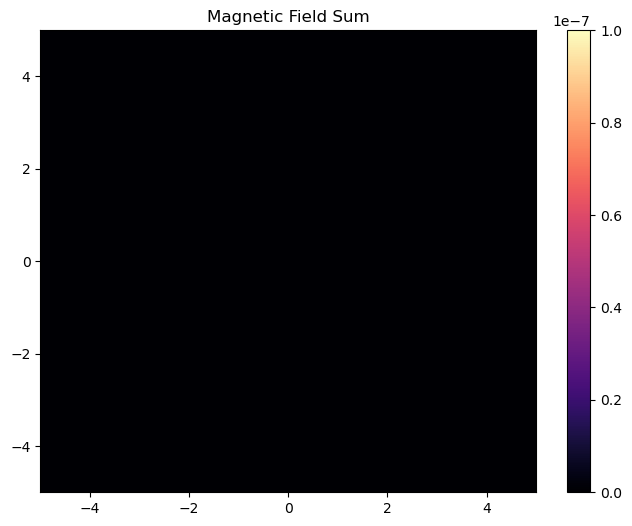

Dipole moment: 4.814760441028187e-12
Flowing current in B: 0.845197670524289
EMF in A: -9.043165130865604e-14
Induced current in A: -9.043165130865604e-14
EMF in B: 4.4019287651194854e-26
Induced current in B: 4.401928765119485e-27
Total current in B: 0.845197670524289
Dipole array at 0.0007575757575757576: 5.810013281007038e-26


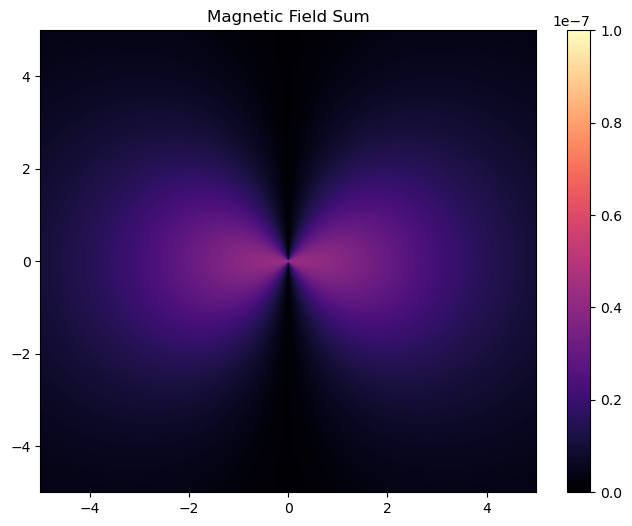

Dipole moment: 4.814760441028187e-12
Flowing current in B: 1.6219224523667926
EMF in A: -8.310541673736745e-14
Induced current in A: -8.310541673736745e-14
EMF in B: -7.8386809767852e-28
Induced current in B: -7.8386809767852e-29
Total current in B: 1.6219224523667926
Dipole array at 0.0015151515151515152: 5.339320558459295e-26


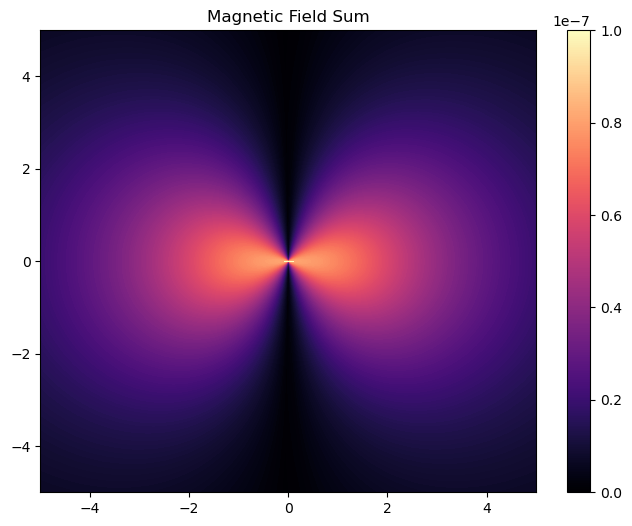

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.2672487230627745
EMF in A: -6.904647554896137e-14
Induced current in A: -6.904647554896137e-14
EMF in B: -1.5042318639262096e-27
Induced current in B: -1.5042318639262097e-28
Total current in B: 2.2672487230627745
Dipole array at 0.0022727272727272726: 4.436067838427212e-26


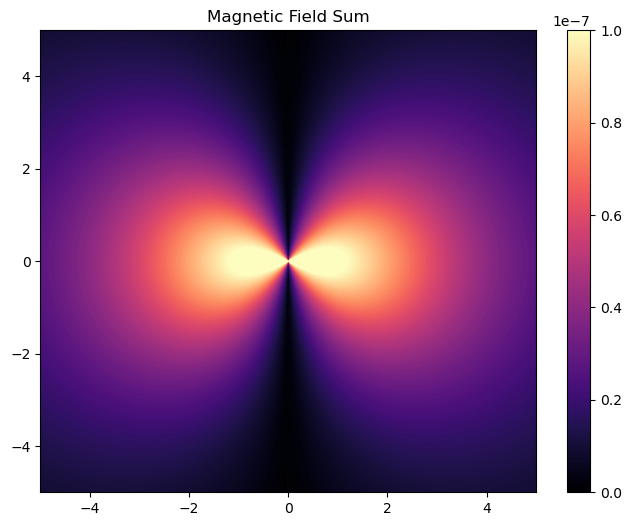

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.728895986063555
EMF in A: -4.939379954677985e-14
Induced current in A: -4.939379954677985e-14
EMF in B: -2.1027317105699457e-27
Induced current in B: -2.1027317105699457e-28
Total current in B: 2.728895986063555
Dipole array at 0.0030303030303030303: 3.173431284437034e-26


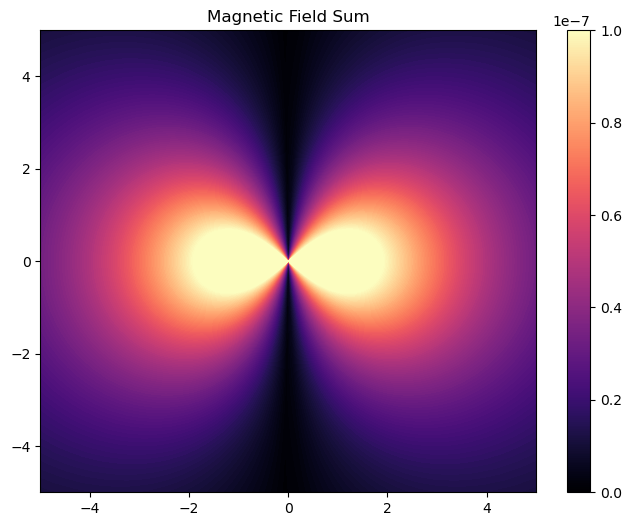

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.969464325642798
EMF in A: -2.5739531661555e-14
Induced current in A: -2.5739531661555e-14
EMF in B: -2.5308807394503126e-27
Induced current in B: -2.5308807394503125e-28
Total current in B: 2.969464325642798
Dipole array at 0.003787878787878788: 1.6537022009043108e-26


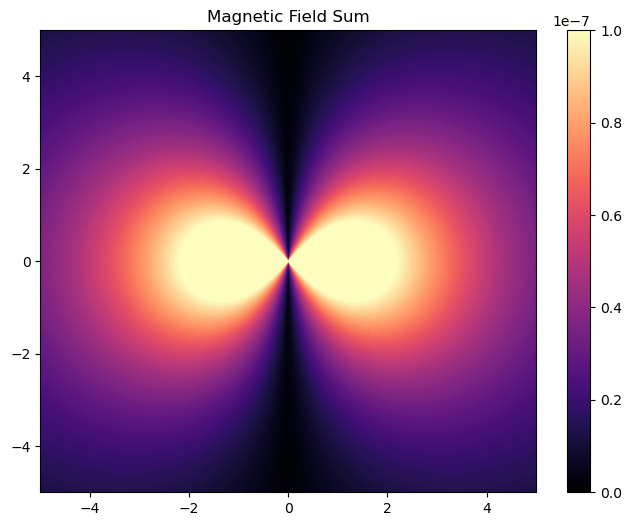

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.9694643256427984
EMF in A: -4.751518133052326e-29
Induced current in A: -4.751518133052326e-29
EMF in B: -2.753992862547718e-27
Induced current in B: -2.753992862547718e-28
Total current in B: 2.9694643256427984
Dipole array at 0.004545454545454545: 3.052734640856582e-41


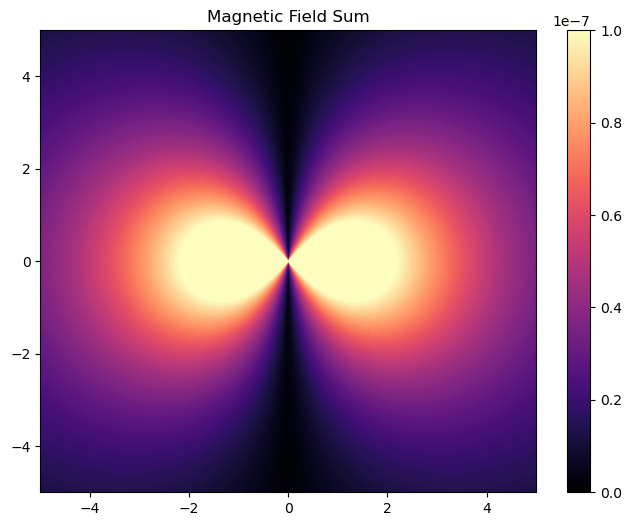

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.7288959860635553
EMF in A: 2.5739531661555e-14
Induced current in A: 2.5739531661555e-14
EMF in B: -2.7539928625477286e-27
Induced current in B: -2.7539928625477284e-28
Total current in B: 2.7288959860635553
Dipole array at 0.005303030303030303: 1.6537022009043108e-26


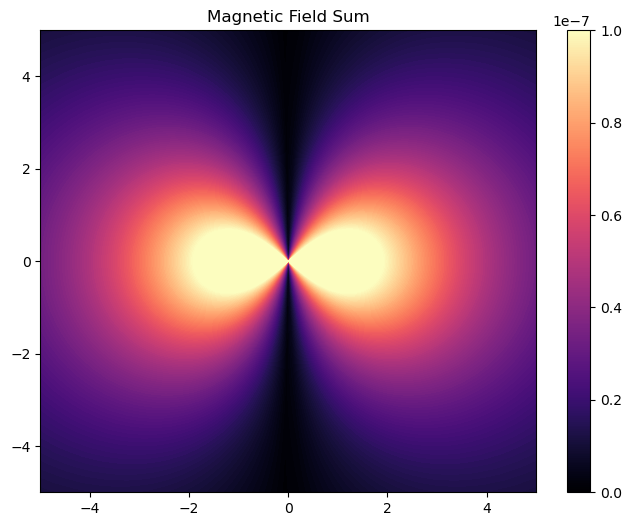

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.267248723062775
EMF in A: 4.939379954677985e-14
Induced current in A: 4.939379954677985e-14
EMF in B: -2.5308807394503126e-27
Induced current in B: -2.5308807394503125e-28
Total current in B: 2.267248723062775
Dipole array at 0.006060606060606061: 3.173431284437034e-26


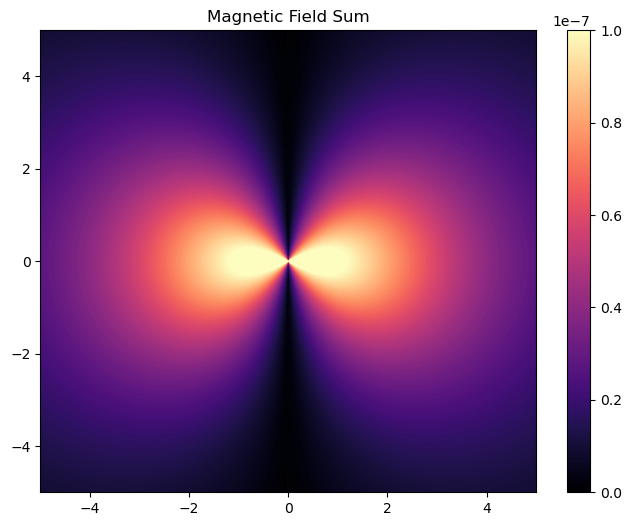

Dipole moment: 4.814760441028187e-12
Flowing current in B: 1.6219224523667934
EMF in A: 6.904647554896131e-14
Induced current in A: 6.904647554896131e-14
EMF in B: -2.1027317105699403e-27
Induced current in B: -2.1027317105699403e-28
Total current in B: 1.6219224523667934
Dipole array at 0.006818181818181818: 4.4360678384272096e-26


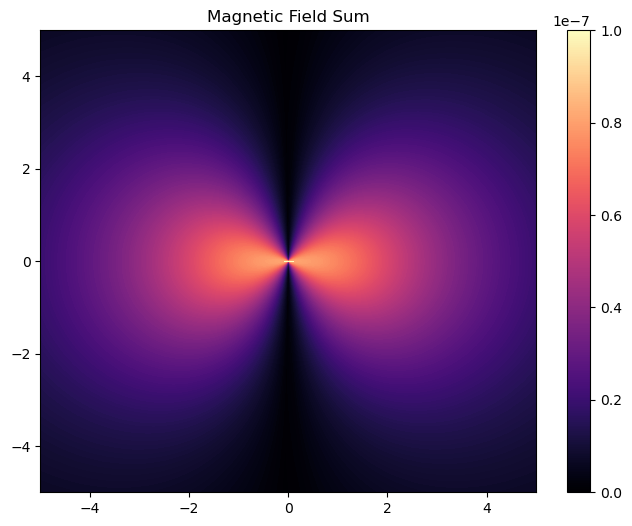

Dipole moment: 4.814760441028187e-12
Flowing current in B: 0.8451976705242902
EMF in A: 8.310541673736741e-14
Induced current in A: 8.310541673736741e-14
EMF in B: -1.5042318639262108e-27
Induced current in B: -1.5042318639262108e-28
Total current in B: 0.8451976705242902
Dipole array at 0.007575757575757576: 5.339320558459291e-26


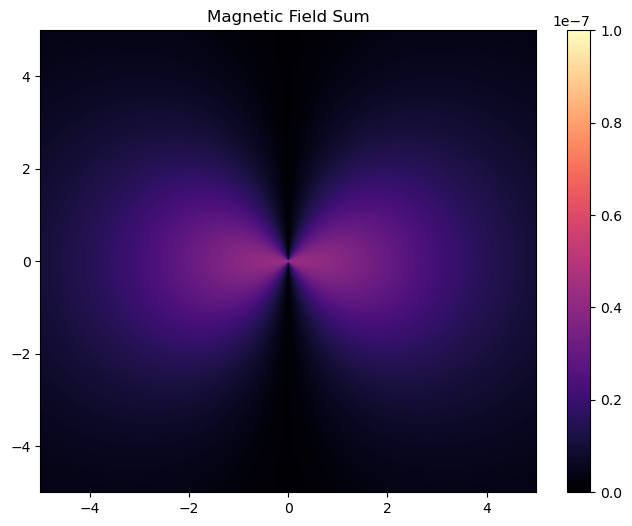

Dipole moment: 4.814760441028187e-12
Flowing current in B: 1.6996616692943939e-15
EMF in A: 9.0431651308656e-14
Induced current in A: 9.0431651308656e-14
EMF in B: -7.8386809767852e-28
Induced current in B: -7.8386809767852e-29
Total current in B: 1.6996616692943156e-15
Dipole array at 0.008333333333333333: 5.810013281007035e-26


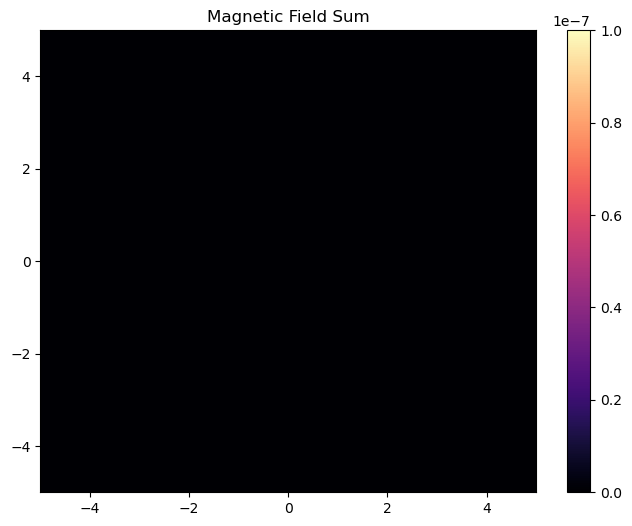

Dipole moment: 4.814760441028187e-12
Flowing current in B: -0.845197670524287
EMF in A: 9.0431651308656e-14
Induced current in A: 9.0431651308656e-14
EMF in B: -0.0
Induced current in B: -0.0
Total current in B: -0.845197670524287
Dipole array at 0.00909090909090909: 5.810013281007035e-26


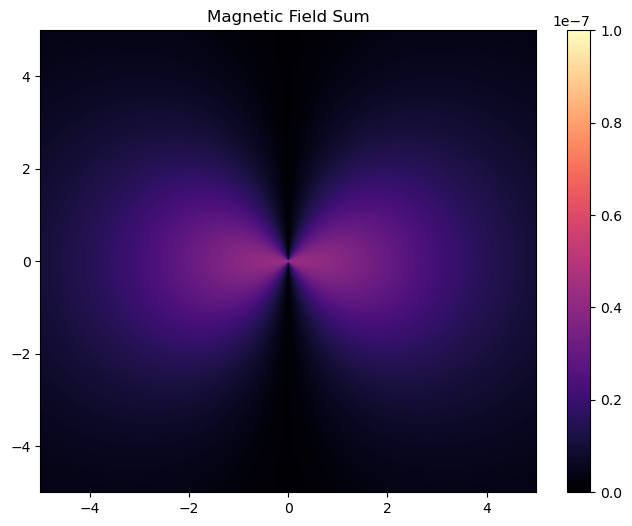

Dipole moment: 4.814760441028187e-12
Flowing current in B: -1.6219224523667903
EMF in A: 8.310541673736743e-14
Induced current in A: 8.310541673736743e-14
EMF in B: 7.8386809767851855e-28
Induced current in B: 7.838680976785185e-29
Total current in B: -1.6219224523667903
Dipole array at 0.009848484848484848: 5.339320558459293e-26


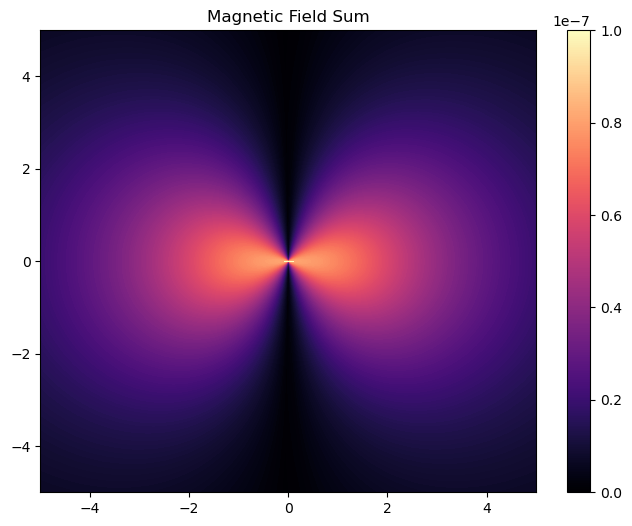

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.2672487230627745
EMF in A: 6.904647554896159e-14
Induced current in A: 6.904647554896159e-14
EMF in B: 1.5042318639261825e-27
Induced current in B: 1.5042318639261825e-28
Total current in B: -2.2672487230627745
Dipole array at 0.010606060606060607: 4.4360678384272274e-26


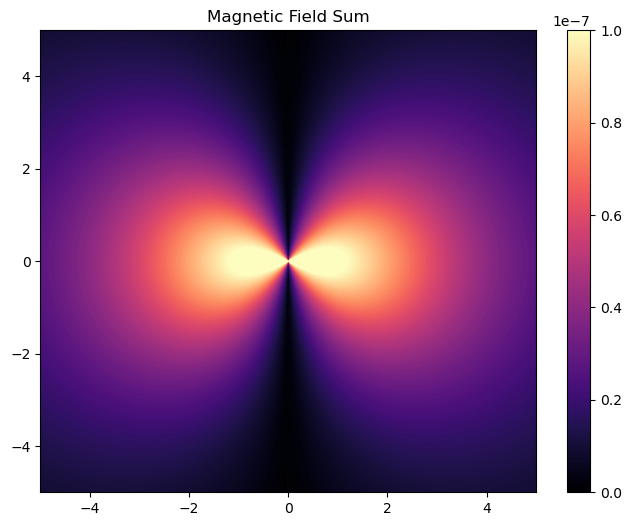

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.728895986063554
EMF in A: 4.939379954677975e-14
Induced current in A: 4.939379954677975e-14
EMF in B: 2.102731710569981e-27
Induced current in B: 2.1027317105699807e-28
Total current in B: -2.728895986063554
Dipole array at 0.011363636363636364: 3.173431284437028e-26


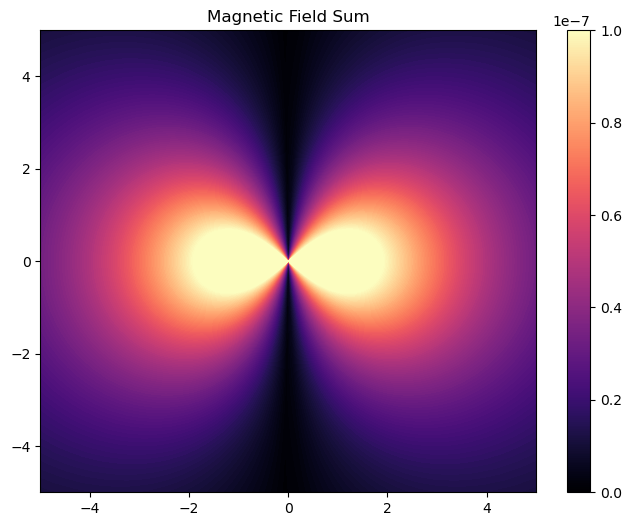

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.969464325642798
EMF in A: 2.5739531661555096e-14
Induced current in A: 2.5739531661555096e-14
EMF in B: 2.5308807394502918e-27
Induced current in B: 2.530880739450292e-28
Total current in B: -2.969464325642798
Dipole array at 0.012121212121212121: 1.6537022009043168e-26


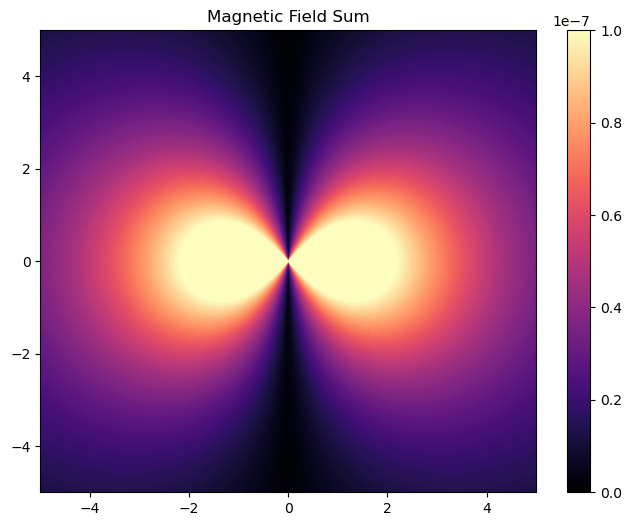

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.9694643256427984
EMF in A: 4.751518133052326e-29
Induced current in A: 4.751518133052326e-29
EMF in B: 2.7539928625477286e-27
Induced current in B: 2.7539928625477284e-28
Total current in B: -2.9694643256427984
Dipole array at 0.012878787878787878: 3.052734640856582e-41


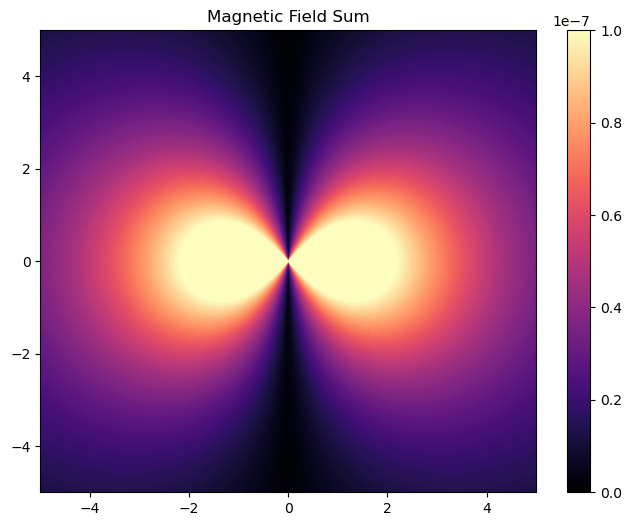

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.7288959860635558
EMF in A: -2.5739531661554954e-14
Induced current in A: -2.5739531661554954e-14
EMF in B: 2.7539928625477235e-27
Induced current in B: 2.7539928625477234e-28
Total current in B: -2.7288959860635558
Dipole array at 0.013636363636363636: 1.6537022009043076e-26


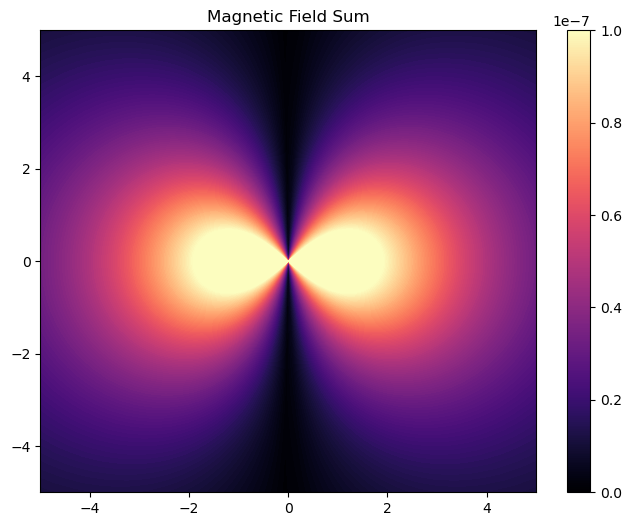

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.2672487230627763
EMF in A: -4.939379954677975e-14
Induced current in A: -4.939379954677975e-14
EMF in B: 2.5308807394503072e-27
Induced current in B: 2.530880739450307e-28
Total current in B: -2.2672487230627763
Dipole array at 0.014393939393939395: 3.173431284437028e-26


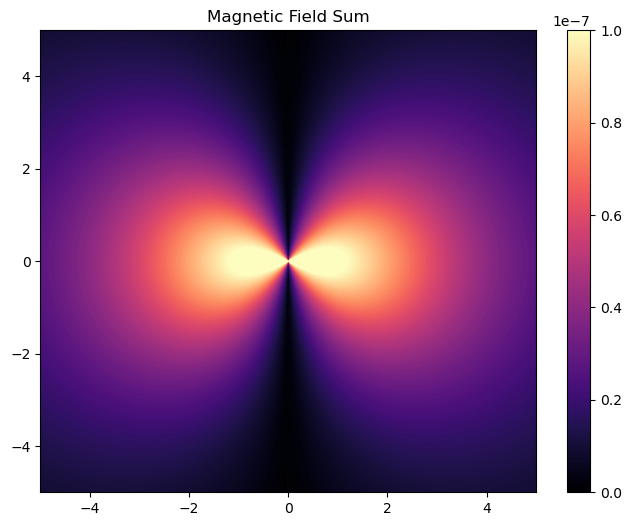

Dipole moment: 4.814760441028187e-12
Flowing current in B: -1.6219224523667948
EMF in A: -6.904647554896131e-14
Induced current in A: -6.904647554896131e-14
EMF in B: 2.102731710569951e-27
Induced current in B: 2.102731710569951e-28
Total current in B: -1.6219224523667948
Dipole array at 0.015151515151515152: 4.4360678384272096e-26


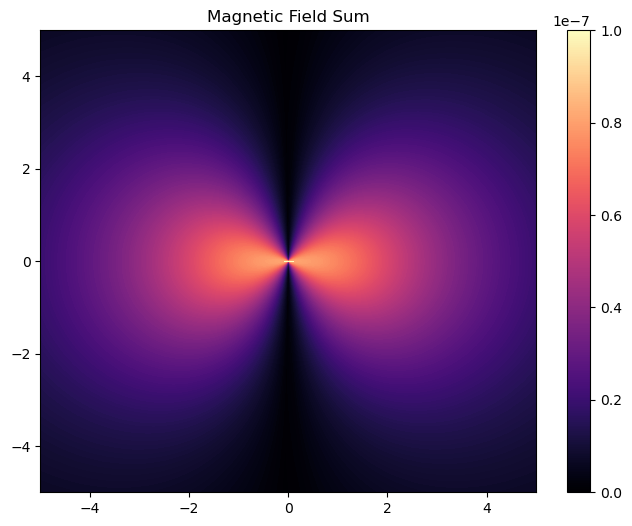

Dipole moment: 4.814760441028187e-12
Flowing current in B: -0.8451976705242918
EMF in A: -8.310541673736738e-14
Induced current in A: -8.310541673736738e-14
EMF in B: 1.504231863926207e-27
Induced current in B: 1.504231863926207e-28
Total current in B: -0.8451976705242918
Dipole array at 0.015909090909090907: 5.339320558459289e-26


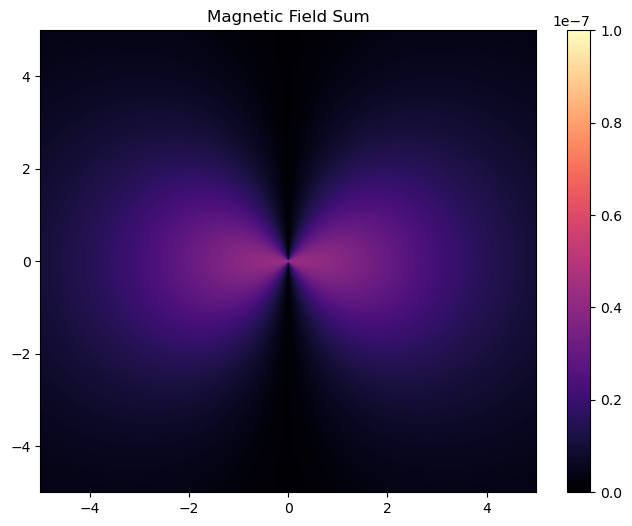

Dipole moment: 4.814760441028187e-12
Flowing current in B: -3.3993233385887878e-15
EMF in A: -9.043165130865599e-14
Induced current in A: -9.043165130865599e-14
EMF in B: 7.838680976785226e-28
Induced current in B: 7.838680976785225e-29
Total current in B: -3.3993233385887093e-15
Dipole array at 0.016666666666666666: 5.810013281007034e-26


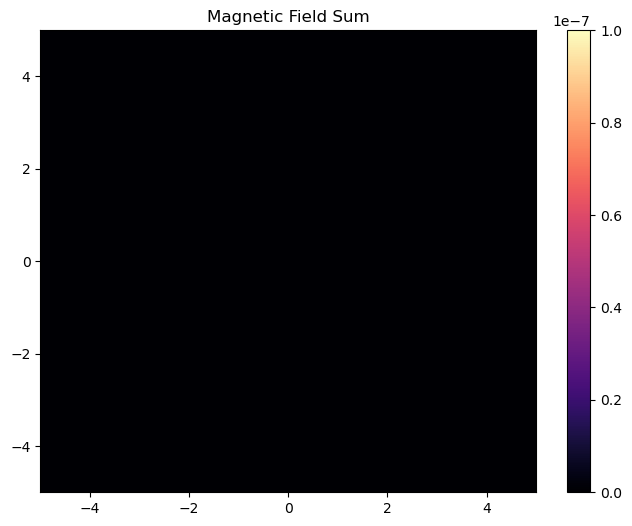

Dipole moment: 4.814760441028187e-12
Flowing current in B: 0.8451976705242878
EMF in A: -9.043165130865629e-14
Induced current in A: -9.043165130865629e-14
EMF in B: 3.2411104255418145e-41
Induced current in B: 3.2411104255418146e-42
Total current in B: 0.8451976705242878
Dipole array at 0.017424242424242425: 5.810013281007054e-26


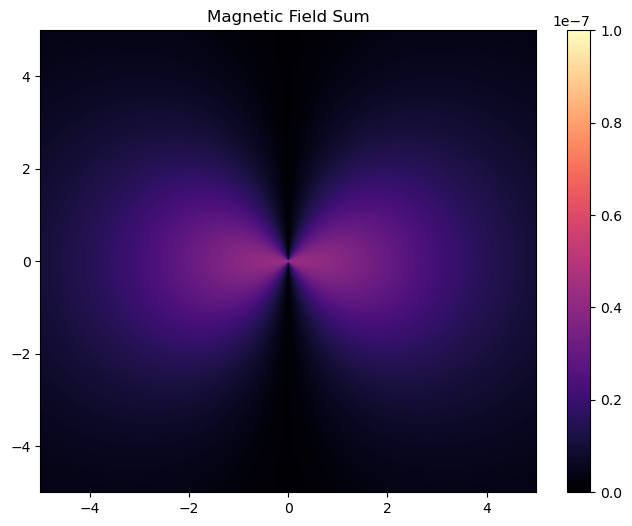

Dipole moment: 4.814760441028187e-12
Flowing current in B: 1.621922452366789
EMF in A: -8.31054167373672e-14
Induced current in A: -8.31054167373672e-14
EMF in B: -7.838680976785739e-28
Induced current in B: -7.838680976785739e-29
Total current in B: 1.621922452366789
Dipole array at 0.01818181818181818: 5.339320558459278e-26


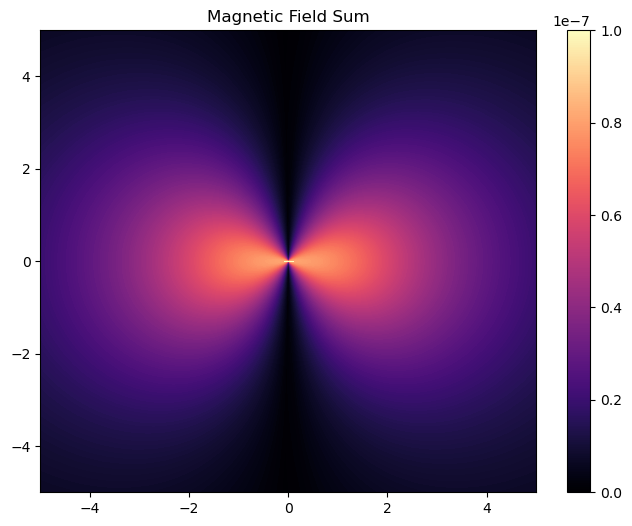

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.267248723062773
EMF in A: -6.904647554896159e-14
Induced current in A: -6.904647554896159e-14
EMF in B: -1.5042318639261583e-27
Induced current in B: -1.5042318639261583e-28
Total current in B: 2.267248723062773
Dipole array at 0.01893939393939394: 4.4360678384272274e-26


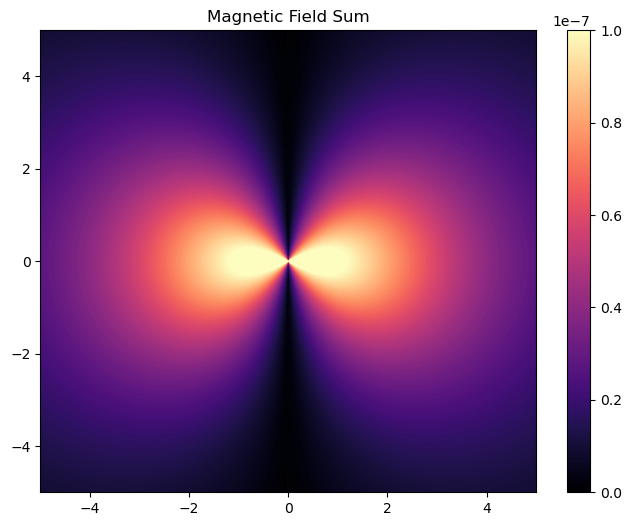

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.728895986063553
EMF in A: -4.93937995467798e-14
Induced current in A: -4.93937995467798e-14
EMF in B: -2.1027317105699755e-27
Induced current in B: -2.1027317105699753e-28
Total current in B: 2.728895986063553
Dipole array at 0.019696969696969695: 3.1734312844370307e-26


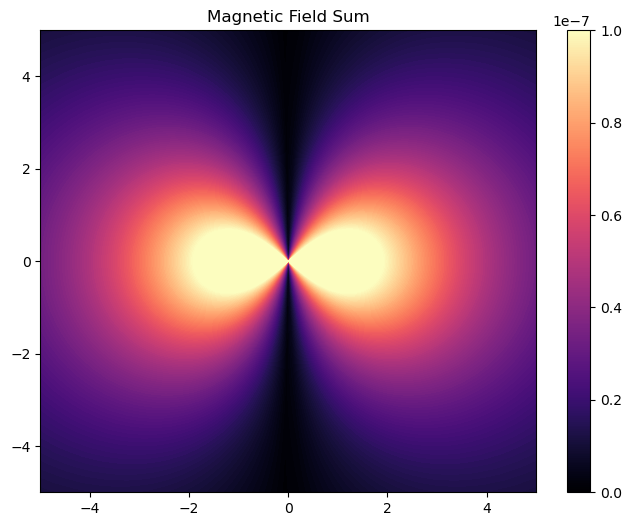

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.9694643256427975
EMF in A: -2.573953166155514e-14
Induced current in A: -2.573953166155514e-14
EMF in B: -2.530880739450292e-27
Induced current in B: -2.5308807394502923e-28
Total current in B: 2.9694643256427975
Dipole array at 0.020454545454545454: 1.6537022009043194e-26


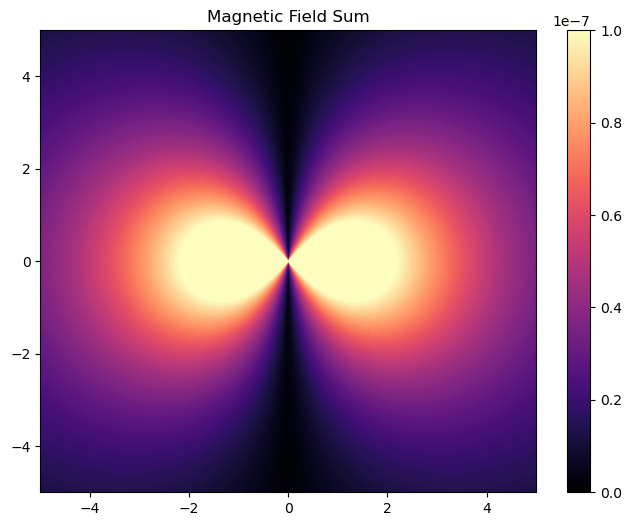

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.9694643256427984
EMF in A: -9.503036266104652e-29
Induced current in A: -9.503036266104652e-29
EMF in B: -2.753992862547728e-27
Induced current in B: -2.753992862547728e-28
Total current in B: 2.9694643256427984
Dipole array at 0.021212121212121213: 6.105469281713164e-41


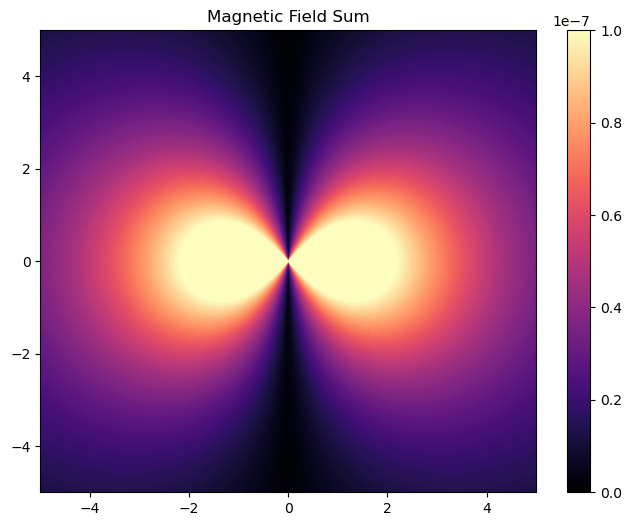

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.728895986063557
EMF in A: 2.573953166155481e-14
Induced current in A: 2.573953166155481e-14
EMF in B: -2.7539928625477128e-27
Induced current in B: -2.7539928625477127e-28
Total current in B: 2.728895986063557
Dipole array at 0.02196969696969697: 1.6537022009042985e-26


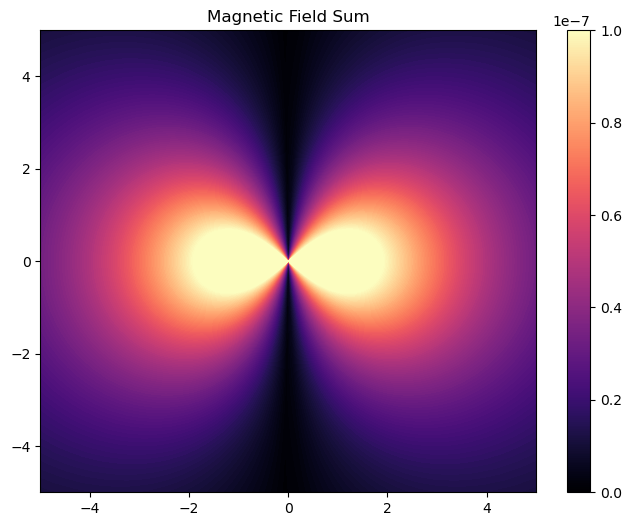

Dipole moment: 4.814760441028187e-12
Flowing current in B: 2.267248723062778
EMF in A: 4.93937995467797e-14
Induced current in A: 4.93937995467797e-14
EMF in B: -2.5308807394503176e-27
Induced current in B: -2.5308807394503175e-28
Total current in B: 2.267248723062778
Dipole array at 0.022727272727272728: 3.1734312844370244e-26


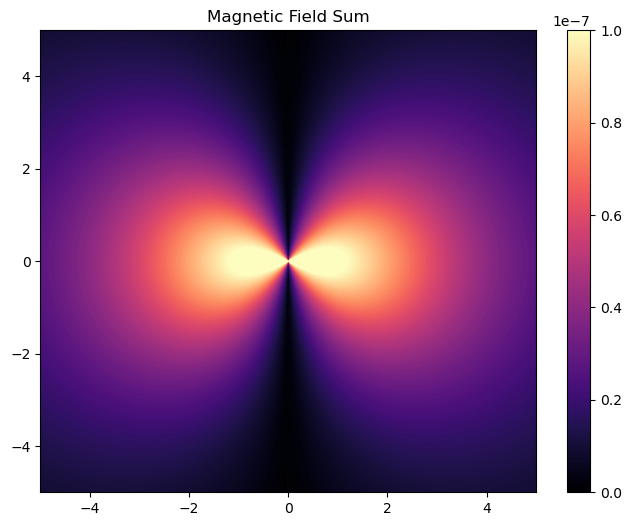

Dipole moment: 4.814760441028187e-12
Flowing current in B: 1.6219224523667974
EMF in A: 6.904647554896121e-14
Induced current in A: 6.904647554896121e-14
EMF in B: -2.102731710569945e-27
Induced current in B: -2.102731710569945e-28
Total current in B: 1.6219224523667974
Dipole array at 0.023484848484848483: 4.436067838427203e-26


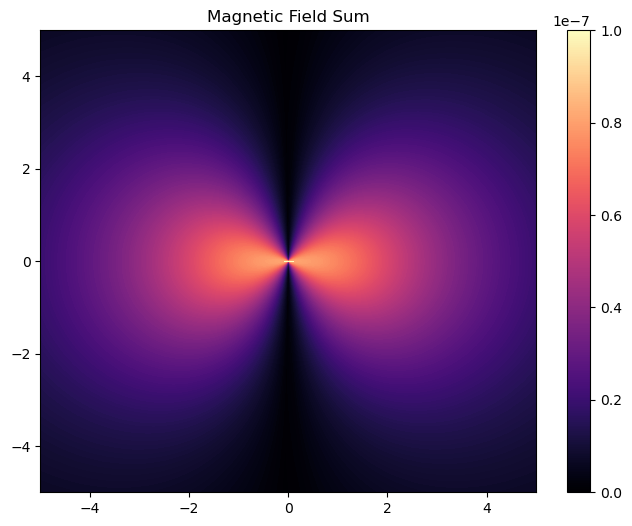

Dipole moment: 4.814760441028187e-12
Flowing current in B: 0.8451976705242896
EMF in A: 8.310541673736789e-14
Induced current in A: 8.310541673736789e-14
EMF in B: -1.504231863926273e-27
Induced current in B: -1.5042318639262731e-28
Total current in B: 0.8451976705242896
Dipole array at 0.024242424242424242: 5.339320558459321e-26


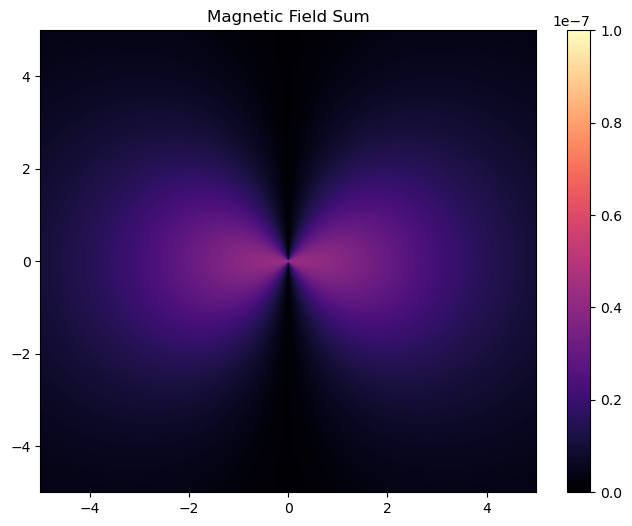

Dipole moment: 4.814760441028187e-12
Flowing current in B: 1.102182119232618e-15
EMF in A: 9.0431651308656e-14
Induced current in A: 9.0431651308656e-14
EMF in B: -7.838680976784685e-28
Induced current in B: -7.838680976784685e-29
Total current in B: 1.1021821192325396e-15
Dipole array at 0.025: 5.810013281007035e-26


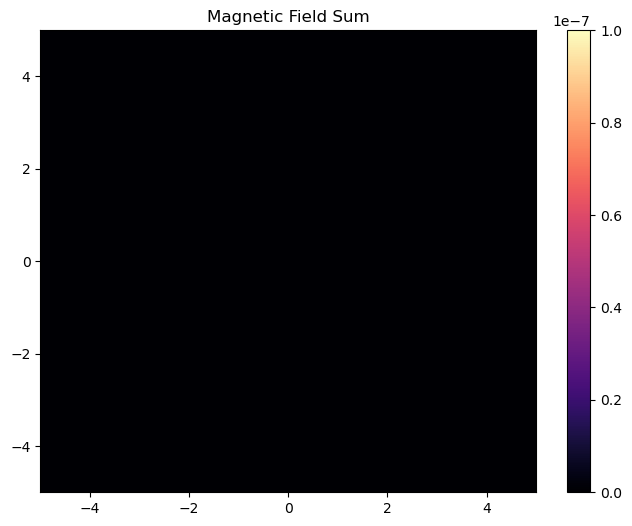

Dipole moment: 4.814760441028187e-12
Flowing current in B: -0.8451976705242875
EMF in A: 9.0431651308656e-14
Induced current in A: 9.0431651308656e-14
EMF in B: -0.0
Induced current in B: -0.0
Total current in B: -0.8451976705242875
Dipole array at 0.025757575757575757: 5.810013281007035e-26


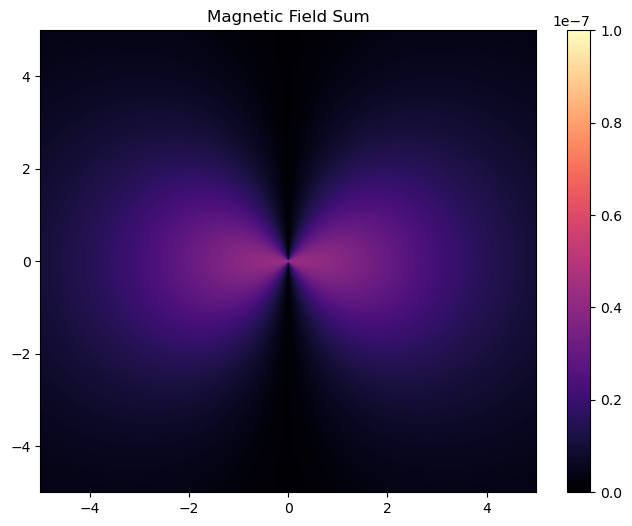

Dipole moment: 4.814760441028187e-12
Flowing current in B: -1.621922452366791
EMF in A: 8.310541673736743e-14
Induced current in A: 8.310541673736743e-14
EMF in B: 7.8386809767851855e-28
Induced current in B: 7.838680976785185e-29
Total current in B: -1.621922452366791
Dipole array at 0.026515151515151516: 5.339320558459293e-26


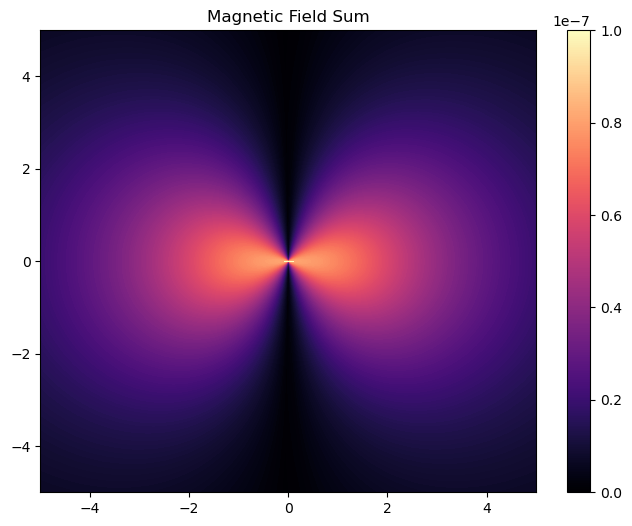

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.267248723062773
EMF in A: 6.904647554896139e-14
Induced current in A: 6.904647554896139e-14
EMF in B: 1.5042318639262042e-27
Induced current in B: 1.5042318639262043e-28
Total current in B: -2.267248723062773
Dipole array at 0.02727272727272727: 4.436067838427215e-26


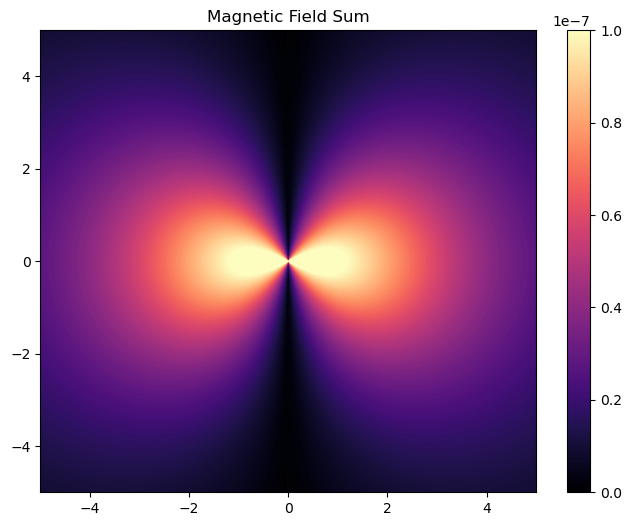

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.7288959860635535
EMF in A: 4.939379954677985e-14
Induced current in A: 4.939379954677985e-14
EMF in B: 2.1027317105699482e-27
Induced current in B: 2.1027317105699484e-28
Total current in B: -2.7288959860635535
Dipole array at 0.02803030303030303: 3.173431284437034e-26


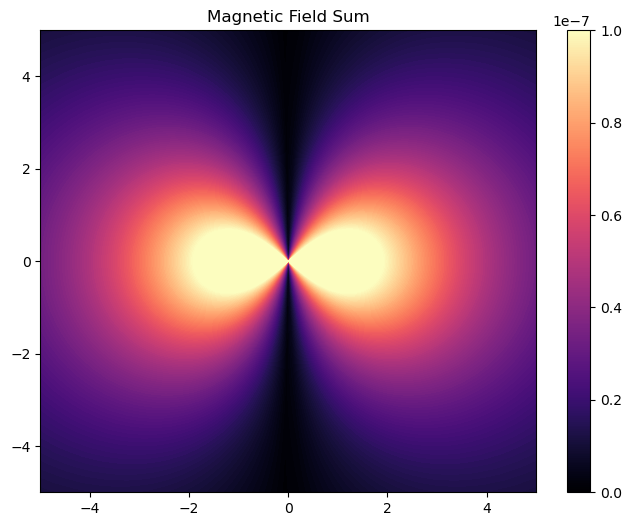

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.9694643256427975
EMF in A: 2.5739531661555096e-14
Induced current in A: 2.5739531661555096e-14
EMF in B: 2.5308807394503026e-27
Induced current in B: 2.5308807394503027e-28
Total current in B: -2.9694643256427975
Dipole array at 0.02878787878787879: 1.6537022009043168e-26


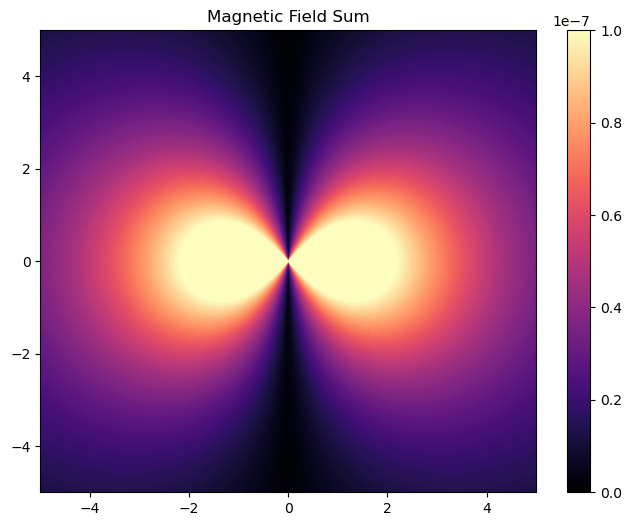

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.969464325642799
EMF in A: 1.4254554399156978e-28
Induced current in A: 1.4254554399156978e-28
EMF in B: 2.753992862547718e-27
Induced current in B: 2.753992862547718e-28
Total current in B: -2.969464325642799
Dipole array at 0.029545454545454545: 9.158203922569747e-41


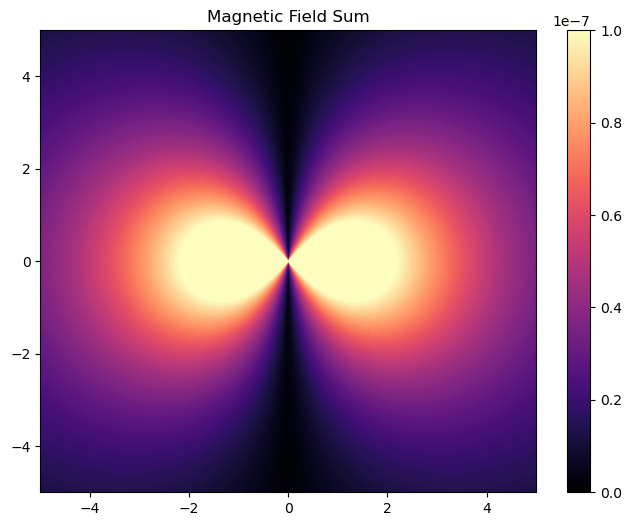

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.728895986063557
EMF in A: -2.573953166155486e-14
Induced current in A: -2.573953166155486e-14
EMF in B: 2.7539928625477235e-27
Induced current in B: 2.7539928625477234e-28
Total current in B: -2.728895986063557
Dipole array at 0.030303030303030304: 1.6537022009043016e-26


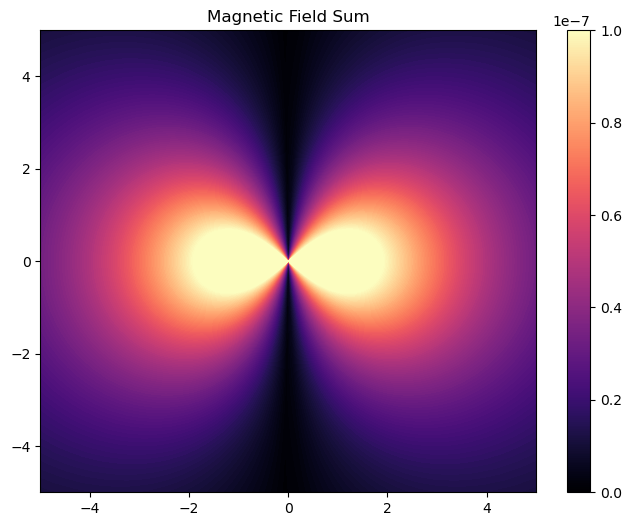

Dipole moment: 4.814760441028187e-12
Flowing current in B: -2.267248723062778
EMF in A: -4.93937995467797e-14
Induced current in A: -4.93937995467797e-14
EMF in B: 2.5308807394503123e-27
Induced current in B: 2.530880739450312e-28
Total current in B: -2.267248723062778
Dipole array at 0.03106060606060606: 3.1734312844370244e-26


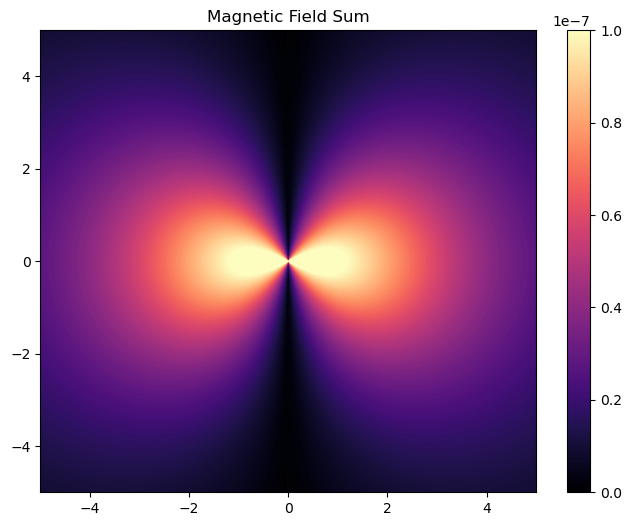

Dipole moment: 4.814760441028187e-12
Flowing current in B: -1.6219224523667977
EMF in A: -6.904647554896119e-14
Induced current in A: -6.904647554896119e-14
EMF in B: 2.102731710569942e-27
Induced current in B: 2.102731710569942e-28
Total current in B: -1.6219224523667977
Dipole array at 0.031818181818181815: 4.4360678384272016e-26


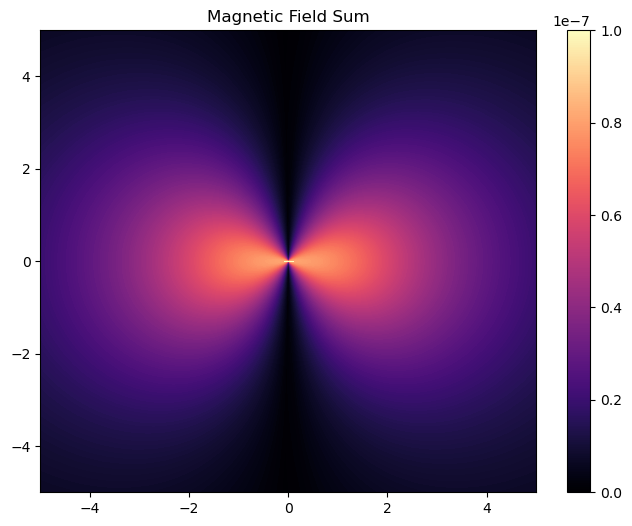

Dipole moment: 4.814760441028187e-12
Flowing current in B: -0.8451976705242901
EMF in A: -8.310541673736788e-14
Induced current in A: -8.310541673736788e-14
EMF in B: 1.5042318639262743e-27
Induced current in B: 1.5042318639262742e-28
Total current in B: -0.8451976705242901
Dipole array at 0.03257575757575758: 5.339320558459321e-26


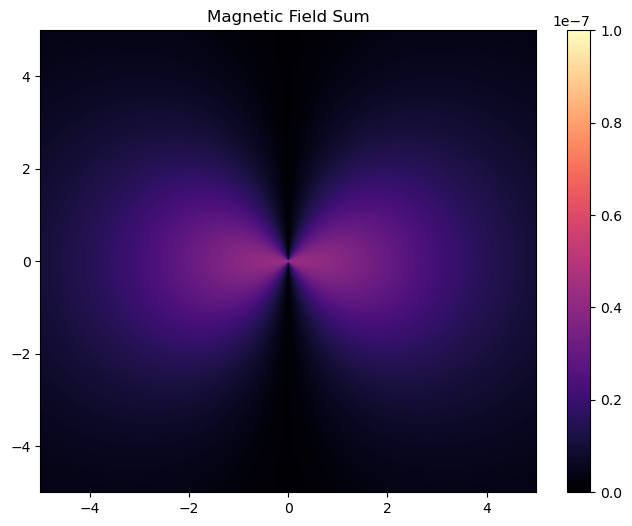

Dipole moment: 4.814760441028187e-12
Flowing current in B: -6.7986466771775755e-15
EMF in A: -9.043165130865545e-14
Induced current in A: -9.043165130865545e-14
EMF in B: 7.838680976784105e-28
Induced current in B: 7.838680976784104e-29
Total current in B: -6.7986466771774974e-15
Dipole array at 0.03333333333333333: 5.810013281006999e-26


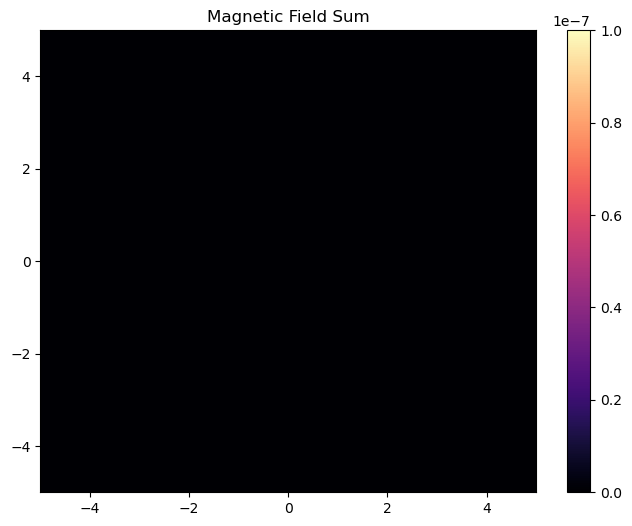

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from scipy import constants

'''
Have to add the calculation of the magnetic field due to an induced emf. To calculate emf we can use (emf = -M*dI_1/dt) and give the loops some internal resistance in order to calculate
emf = I_2R_2. Solving this for I_2 we get the induced current due to the change in current of the other loop. Now that we have this current we can add it to the internal current that it may have
in order to get the total current flowing through the loop. We use this current then to find the magnetic field. 
'''
 
def dipole_magnetic_field(r, theta, R, I, shift):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    area = np.pi*R**2
    m = I*area
    const = (constants.mu_0*m)/(4*np.pi*(np.sqrt(x**2 + (y - shift)**2))**3)
    Br = const*2*np.cos(theta)
    Btheta = const*np.sin(theta)
    
    return Br, Btheta

def loop_magnetic_field(r, theta, R, I):
    Br = 0
    Btheta = (constants.mu_0 * I * R**2 * np.cos(theta)) / (2 * np.pi * (r**2 + R**2)**(3/2))

    return Br, Btheta

# Initializing values
lim = 5 # Bounds for plot
r = np.linspace(0.001, 10, 100)  # Polar radial distance
theta = np.linspace(0, 2*np.pi, 100)  # Polar angle
ms = [] # Magnetic moment list for dipole
R, Theta = np.meshgrid(r, theta) # Polar coordinates meshgrid
f = 60 # Frequency of current
dt = 45
ts = np.linspace(0,2*(1/f),dt) # Time array
omega = 2*constants.pi*f # Angular frequency of current
I0 = 3 # Peak current
Is = [] # Empty current list for plotting
j = 0 # Inital index for file naming
b = 4 # Radius of loop of wire
a = 0.4e-2 # Radius of little loop of wire
z0 = (1/2)*lim # Separation between loops
resistance_a = 1
resistance_b = 10
I_old_b = I0
I_old_a = 0
I_total_a = I_old_a

for t in ts:
    I = I0*np.sin(omega*t) # Current in loop B
    z = z0 # Separation between two at time t
    M = (constants.mu_0*np.pi*a**2*b**2) / (2*(b**2 + z**2)**(3/2)) # Mutual Inductance as a function of z
    emf_a = -M*(I - I_old_b)/dt # Induced emf in Loop A and B
    I_induced_a = emf_a / resistance_a # Induced current in Loop A due to change in current in Loop B
    emf_b = -M*(I_induced_a - I_old_a)/dt
    I_induced_b = emf_b / resistance_b # Induced current in loop B due to change in current in loop A
    I_total_b = I + I_induced_b
    print(f'Mutual Inductance: {M}')
    print(f'Flowing current in B: {I}')
    print(f'EMF in A: {emf_a}')
    print(f'Induced current in A: {I_induced_a}')
    print(f'EMF in B: {emf_b}')
    print(f'Induced current in B: {I_induced_b}')
    print(f'Total current in B: {I_total_b}')

    Br_loop, Btheta_loop = loop_magnetic_field(R, Theta, R=b, I=I_total_b)
    B_mag_loop = np.sqrt(Br_loop**2 + Btheta_loop**2)

    Br_loop2, Btheta_loop2 = dipole_magnetic_field(R, Theta, R=a, I=I_induced_a, shift=z)
    B_mag_loop2 = np.sqrt(Br_loop2**2 + Btheta_loop2**2)

    I_old_b = I_total_b
    I_old_a = I_induced_a

    # Convert polar coordinates to Cartesian coordinates
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    vmin = 0
    vmax = 1e-7

    '''
    # Plot magnetic field using contour plot
    plt.figure(figsize=(8, 6))
    loop1 = plt.contourf(X, Y, B_mag_loop, levels=200, cmap='magma', extend='both', vmax=vmax, vmin=vmin)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title(f'Loop 1 Magnetic Field with R = b')
    plt.colorbar(ScalarMappable(norm=loop1.norm, cmap=loop1.cmap))
    plt.show()

    plt.figure(figsize=(8, 6))
    loop2 = plt.contourf(X, Y, B_mag_loop2, levels=200, cmap='magma', extend='both')
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title(f'Loop 2 Magnetic Field with dipole appoximation')
    plt.colorbar(ScalarMappable(norm=loop2.norm, cmap=loop2.cmap))
    plt.show()
    '''

    print(f'Dipole array at {t}: {B_mag_loop2[1][0]}')

    plt.figure(figsize=(8, 6))
    loop3 = plt.contourf(X, Y, B_mag_loop2 + B_mag_loop, levels=200, cmap='magma', extend='both', vmin=vmin, vmax=vmax)
    plt.xlim(-lim,lim)
    plt.ylim(-lim,lim)
    plt.title(f'Magnetic Field Sum')
    plt.colorbar(ScalarMappable(norm=loop3.norm, cmap=loop3.cmap))
    plt.show()